In [ ]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np
import os
provider = QuantumRingsProvider(token=os.environ.get('TOKEN_QUANTUMRINGS'), name=os.environ.get('ACCOUNT_QUANTUMRINGS'))
backend = provider.get_backend("scarlet_quantum_rings")
shots = 100
provider.active_account()


In [2]:
def plot_histogram (counts, title=""):
    """
    Plots the histogram of the counts

    Args:

        counts (dict):
            The dictionary containing the counts of states

        titles (str):
            A title for the graph.

    Returns:
        None

    """
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]

    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)

    plt.bar(unique, bin_counts)

    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    # Show plot
    plt.title(title)
    plt.show()
    return

def simons_func (qc, a):
    n = qc.num_qubits // 2

    # put the first half - REG 1 through H gate
    for i in range (n):
        qc.h(i)

    qc.barrier()

    # build the oracle function
    for i in range (n):
        if ( 0!= (( 1 << i) & a)):
            for j in range (n):
                qc.cx(q[i], q[j+n])
    qc.barrier()

    # measure the lower half REG 2
    for i in range (n, qc.num_qubits):
        qc.measure(i,i)
    qc.barrier()

    # Apply H transform to REG 1
    for i in range (n):
        qc.h(i)
    qc.barrier()

    # Finally measure the first half  REG 1
    for i in range (n):
        qc.measure(i,i)

    return

Enter the hidden string as a binary value:  100010101


Job Running
Job Done.
Ending Job Monitor


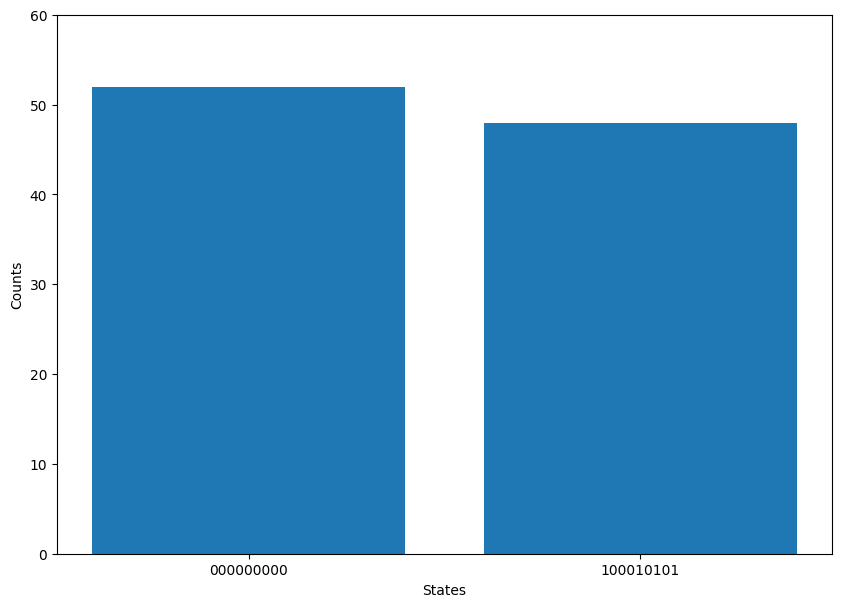

In [3]:
# obtain the hidden string from the user
hiddenstring = int(input("Enter the hidden string as a binary value: "), 2)

#determine the number of qubits required to represent the hidden string
numberofqubits = hiddenstring.bit_length()

# add a qubit for the ancilla register
numberofqubits *= 2

q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(numberofqubits , 'c')
qc = QuantumCircuit(q, c)

simons_func(qc, hiddenstring )

job = backend.run(qc, shots)
job_monitor(job)
result = job.result()
counts = result.get_counts()

# plot the histogram for REG 1 alone
res_plot = {}
for i in counts.keys():
    inp = i[numberofqubits // 2:]
    if inp in res_plot:
        res_plot[inp] += counts[i]
    else:
        res_plot[inp] = counts[i]
plot_histogram(res_plot, "")